SPARK FOUNDATION 
TASK 2 : Predict the optimum number of clusters are reprsent it visually  

 BY IMAD DARVESH 

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data= pd.read_csv("F:\DATA SETS\Iris_dataset.csv")

In [3]:
data.head() #load the first five rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() # load the last five rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#checking for null values 
(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

NaN Standing for not a number ,is a numeric data type used to represent any value that is undefined or unpresentable .for example is 0/0 is undfined as a real number and is,therefore,represented by Nan so in this dataset ,we dont have such value

In [6]:
#checking Statistical description 
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Now ,let's check for unique classes in the dataset.

In [7]:
(data.Species.nunique())
(data.Species.value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Step 2 : Data Visualization

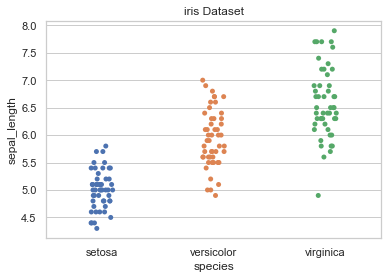

In [8]:
sns.set(style= 'whitegrid')
iris= sns.load_dataset('iris');
ax= sns.stripplot(x='species',y= 'sepal_length',data= iris)
plt.title('iris Dataset')
plt.show()

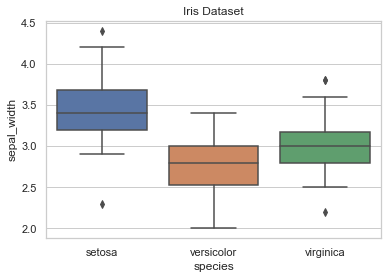

In [9]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

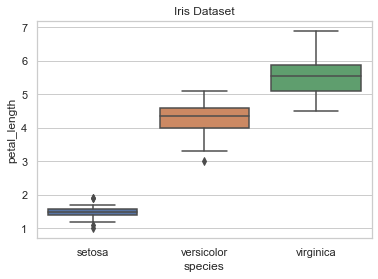

In [10]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

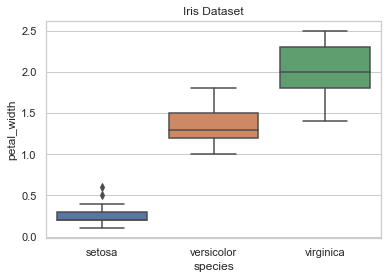

In [11]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

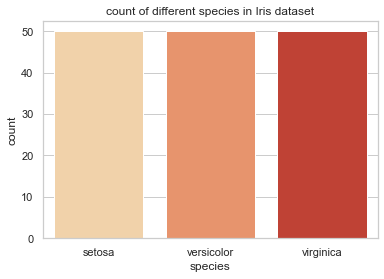

In [14]:
#count plot
sns.countplot(x='species',data=iris, palette="OrRd")
plt.title("count of different species in Iris dataset")
plt.show()

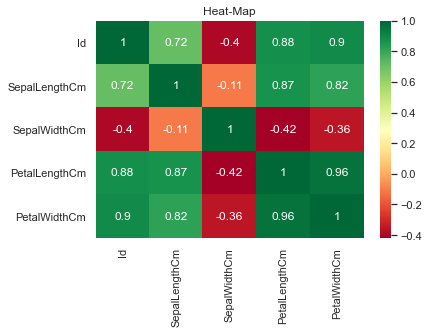

In [13]:
# Heat map
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

# step 3 : finding the optimum number of clusters using k_means clustering  

In [15]:
#finding the optimum number of clusters using k_means clustering
x= data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the wcss to the list (kmeans.inertia_return the wcss value for an initialozed cluster)
    wcss.append(kmeans.inertia_)
    print('k:',i,"wcss",kmeans.inertia_)

k: 1 wcss 281831.54466666654
k: 2 wcss 70581.3808
k: 3 wcss 31320.711199999994
k: 4 wcss 17762.657226173542
k: 5 wcss 11423.238080088988
k: 6 wcss 7909.5306730769225
k: 7 wcss 5881.448116883118
k: 8 wcss 4562.780079365082
k: 9 wcss 3579.7205612745106
k: 10 wcss 2968.4914326653743


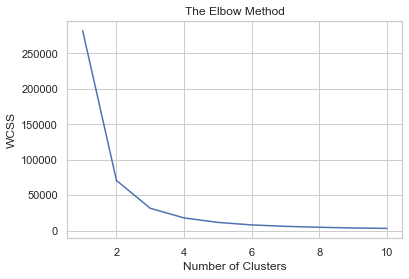

In [16]:
#ploting the result onto a line graph ,allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

we can see that after 3 the drop in wcss is minimal. So we choose 3 as the optimal number of clusters. 

# step 4: initilizing K-Means With Optimum Number Of Clusters

In [17]:
#Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
#return a label for each data point based on the number of clusters 
y_kmeans =kmeans.fit_predict(x)

# Step 5:Predicting Values

In [18]:
y_kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Step 6: Visualizing the Clusters

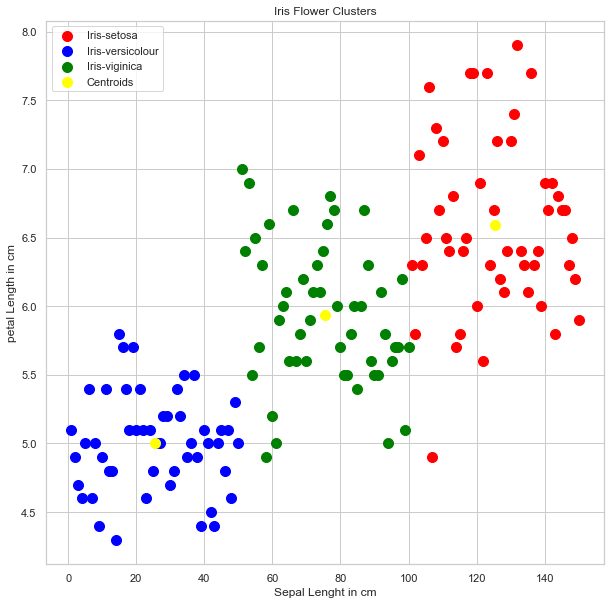

In [19]:
#Visualizing the Clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-viginica')

#plotting the centroids of he clusters 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Lenght in cm')
plt.ylabel('petal Length in cm')
plt.legend()
plt.show()